In [1]:
"""
Syntax dibawah merupakan syntax untuk mengimport/memanggil library library yang akan
digunakan untuk mengolah citra yang ada, library-library yang digunakan antara lain, 
metplotlib.pyplot (plt), cv2 (cv) dan numpy (np)
"""
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitum function display
yang digunakan untuk menampilkan hasil citra dan perubahannya. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def display (One, Two):

    """
    Syntax dibawah merupakan inisialisasi variabel fig, yang merupakan variabel untuk
    menyimpan method figure dari library matplotlib.pyplot (plt) yang digunakan
    untuk menambahkan subplot agar bisa menampilkan citra secara menyamping (side-to-side)
    antara citra asli dan perubahannya
    """
    fig = plt.figure(figsize=(7, 9))
    fig.add_subplot(121)
    plt.imshow(One, 'gray')
    fig.add_subplot(122)
    plt.imshow(Two, 'gray')

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function displaywithHistogram
yang digunakan untuk menampilkan hasil citra dan histogramnya. Cara memanggilnya cukup
dengan menulis nama function dan memenuhi parameternya jika ada
"""
def displaywithHistogram (Image):

    """
    Syntax dibawah merupakan inisialisasi dari variabel grayIndex yang diisi dengan
    sebuah array dan grayData yang diisi dengan nilai balikan dari function histogram
    yang dipanggil
    """
    grayIndex = [i for i in range(np.max(Image)+1)]
    grayData = histogram(Image)

    """
    Syntax dibawah merupakan inisialisasi variabel fig, yang merupakan variabel untuk
    menyimpan method figure dari library matplotlib.pyplot (plt) yang digunakan
    untuk menambahkan subplot agar bisa menampilkan citra secara menyamping (side-to-side)
    antara citra asli dan histogramnya
    """
    fig = plt.figure(figsize=(10, 4))
    fig.add_subplot(121)
    plt.imshow(Image, 'gray')
    fig.add_subplot(122)
    plt.bar(grayIndex, grayData)

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function histogram
yang digunakan untuk melakukan proses pembuatan histogram dari citra yang dimasukkan
kedalam function histogram ini.Cara memanggilnya cukup dengan menulis nama 
function dan memenuhi parameternya jika ada
"""
def histogram (image):

    """
    Syntax dibawah merupakan inisialisasi dari variabel grayResult yang diisi dengan
    sebuah array bernilai nol
    """
    grayResult = np.zeros(np.max(image)+1).astype(int)

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel (0,0) pada citra sampai index 
    terakhir dari citra
    """
    for rows in range(image.shape[0]):
        for cols in range(image.shape[1]):
            grayValue = image[rows][cols]
            grayResult[grayValue] += 1
    
    """
    Syntax dibawah merupakan pengembalian hasil pencarian 
    persebaran nilai tingkat keabuan sebuah citra
    setelah pemanggilan dari function ini
    """
    return grayResult

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function Ekualisasi
yang dimana merupakan function yang digunakan untuk memproses pengekualisasian
sebuah citra yang dimasukkan kedalam function ini
"""
def Ekualisasi (image):

    """
    Syntax dibawah merupakan inisialisasi dari variabel level yang diisi dengan
    nilai intensitas maksimal dari citra lalu ditambah dengan satu agar bisa
    tetap bernilai seperti nilai normal tanpa kaidah nilai pada indeks array,
    variabel tinggi dan lebar yang diisi dengan nilai tinggi dan lebar dari citra
    result yang diisi dengan array bernilai nol dengan ukuran array sebesar ukuran
    dari citra, hist yang diisi dengan array bernilai nol dengan ukuran array sebesar
    nilai dari variabel level lalu diisi langsung dengan nilai balikan dari function
    histogram yang dipanggil
    """
    level = np.max(image)+1
    tinggi, lebar = image.shape
    result = np.zeros(image.shape)
    hist = np.zeros(level).astype(int)
    hist = histogram(image)

    """
    Syntax dibawah merupakan inisialisasi dari variabel cummulative yang diisi dengan 
    array bernilai nol dengan ukuran array sebesar nilai dari variabel level. Lalu
    langsung diisi dengan jumlah dari nilai pada variabel hist sampai indeks tertentu
    dengan menggunakan perulangan for untuk mengambil nilai dari variabel hist sampai ke
    indeks tertentu
    """
    cummulative = np.zeros(level).astype(int)
    for i in range(level):
        cummulative[i] = np.sum( hist[0:i+1] )

    """
    Syntax dibawah merupakan inisialisasi dari variabel target value yang diisi
    dengan hasil perhitungan rumus pada ekualisasi citra, lalu hasilnya dilakukan
    pembulatan ke bilangan bulat terdekat menggunakan method round dari
    library numpy (np)
    """
    target_value = cummulative*(level-1)/(tinggi*lebar)
    target_value = np.round(target_value).astype(int)

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel (0,0) pada citra sampai index 
    terakhir dari citra
    """
    for i in range(tinggi):
        for j in range(lebar):
            result[i, j] = target_value[image[i,j]]
    
    """
    Syntax dibawah merupakan pengembalian hasil ekualisasi 
    dari citra setelah pemanggilan dari function ini
    """
    return result

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function find_target
yang dimana merupakan salah satu function yang digunakan untuk memproses 
pengspesifikasian sebuah citra yang dimasukkan kedalam function ini
"""
def find_target(image):

    """
    Syntax dibawah merupakan inisialisasi dari variabel level yang diisi dengan
    nilai intensitas maksimal dari citra lalu ditambah dengan satu agar bisa
    tetap bernilai seperti nilai normal tanpa kaidah nilai pada indeks array,
    variabel tinggi dan lebar yang diisi dengan nilai tinggi dan lebar dari citra
    hist yang diisi dengan array bernilai nol dengan ukuran array sebesar
    nilai dari variabel level lalu diisi langsung dengan nilai balikan dari function
    histogram yang dipanggil
    """
    level = np.max(image)+1
    tinggi, lebar = image.shape
    hist = np.zeros(level).astype(int)
    hist = histogram(image)

    """
    Syntax dibawah merupakan inisialisasi dari variabel cummulative yang diisi dengan 
    array bernilai nol dengan ukuran array sebesar nilai dari variabel level. Lalu
    langsung diisi dengan jumlah dari nilai pada variabel hist sampai indeks tertentu
    dengan menggunakan perulangan for untuk mengambil nilai dari variabel hist sampai ke
    indeks tertentu
    """
    cummulative = np.zeros(level).astype(int)
    for i in range(level):
        cummulative[i] = np.sum( hist[0:i+1] )

    """
    Syntax dibawah merupakan inisialisasi dari variabel target value yang diisi
    dengan hasil perhitungan rumus pada ekualisasi citra, lalu hasilnya dilakukan
    pembulatan ke bilangan bulat terdekat menggunakan method round dari
    library numpy (np)
    """
    target_value = cummulative*(level-1)/(tinggi*lebar)
    target_value = np.floor(target_value).astype(int)

    """
    Syntax dibawah merupakan pengembalian hasil pencarian
    target dari citra setelah pemanggilan dari function ini
    """
    return target_value

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function 
find_closest_value yang dimana merupakan salah satu function yang 
digunakan untuk memproses pengspesifikasian sebuah citra yang dimasukkan 
kedalam function ini
"""
def find_closest_value(nilai, tujuan):

    """
    Syntax dibawah merupakan inisialisasi dari variabel min yang diisi dengan nilai
    absolut nilai dikurangi dengan tujuan pada indeks 0 dan variabel value_min yang
    diisi dengan nilai 0
    """
    min = abs(nilai-tujuan[0])
    value_min = 0

    """
    Syntax dibawah merupakan proses untuk melakukan pemetaan akhir dari proses
    spesifikasi pada citra yang diinginkan dengan melakukan pengecekan nilai
    pada hasil histogram citra asli dengan hasil histogram citra target dan memanfaatkan
    perulangan for untuk melakukan iterasi dari indeks awal histogram citra asli sampai
    indeks akhir citra asli
    """
    for i in range(len(tujuan)):
        check = abs(nilai-tujuan[i])
        if(min > check):
            min = check
            value_min = i

    """
    Syntax dibawah merupakan pengembalian hasil pemetaan
    dari citra setelah pemanggilan dari function ini
    """
    return value_min

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function spesification
yang dimana merupakan function yang digunakan untuk memproses penspesifikasian
sebuah citra yang dimasukkan kedalam function ini
"""
def spesification (image1, image2):

    """
    Syntax dibawah merupakan inisialisasi dari variabel level yang diisi dengan
    nilai intensitas maksimal dari citra lalu ditambah dengan satu agar bisa
    tetap bernilai seperti nilai normal tanpa kaidah nilai pada indeks array,
    result yang diisi dengan array bernilai nol dengan ukuran array sebesar ukuran
    dari citra dan map yang diisi dengan array bernilai 0 dengan ukuran sebesar nilai
    darii variabel level
    """
    level = np.max(image1)+1
    result = np.zeros(image1.shape).astype(int)
    map = np.zeros(level, dtype=int).astype(int)

    """
    Syntax dibawah merupakan inisialisasi dari variabel target1 yang berisi nilai balikan
    dari function find_target dan target2 yang diisi dengan nilai balikan dari function
    find_target
    """
    target1 = find_target(image1)
    target2 = find_target(image2)

    """
    Syntax dibawah ini merupakan inisialisasi dari variabel map pada indeks tertentu
    yang diisi dengan nilai balikan dari function find_closest_value untuk memetakan
    nilai dari spesifikasi dari histogram citra dengan memanfaatkan perulangan for
    untuk 
    """
    for i in range(level):
        map[i] = find_closest_value(target1[i], target2)

        """
        Syntax dibawah merupakan proses memindahkan hasil mapping ke dalam canvas
        kosong untuk memetakan citra nya setelah dilakukan proses spesifikasi dengan
        memanfaatkan perulangan nested for untuk melakukan pemetaan itu karena citra 
        berbentuk array 2 dimensi
        """
        for i in range(image1.shape[0]):
            for j in range(image1.shape[1]):
                result[i, j] = map[image1[i, j]]

    """
    Syntax dibawah merupakan pengembalian hasil spesifikasi
    dari citra setelah pemanggilan dari function ini
    """
    return result

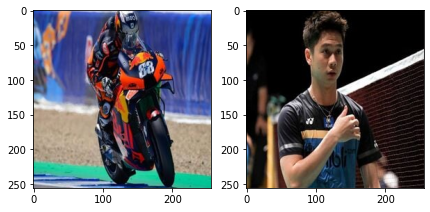

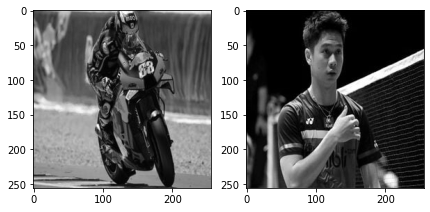

In [5]:
"""
Syntax dibawah merupakan insialisasi dari variabel image1 dan image2, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library matplotlib.pyplot (plt) yang dimana citranya diambil 
dari local komputer dan menampilkannya dengan method imshow dari method yang sama
"""
image1 = plt.imread('Jurnal3.1.jpg')
image2 = plt.imread('Jurnal3.2.jpg')

"""
Syntax dibawah merupakan inisialisasi dari variabel grayimg1 dan grayimg2 yang merupakan 
variabel yang berisi citra sebelumnya pada variabel image1 dan image2 namun diubah 
kedalam intensitas warna abu dengan menggunakan method grayscale dari library cv2
"""
grayimg1 = cv.cvtColor(image1, cv.COLOR_RGB2GRAY)
grayimg2 = cv.cvtColor(image2, cv.COLOR_RGB2GRAY)

"""
Syntax dibawah merupakan pemanggilan function display guna menampilkan
hasil citra asli dan perubahannya
"""
display(image1, image2)
display(grayimg1, grayimg2)

# 1. Menampilkan Histogram Image 1

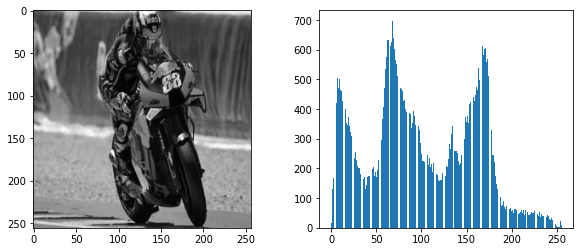

In [6]:
"""
Syntax dibawah merupakan penginisialisasian dari variabel histimg1 dan 
histogramNegative, yang mana diisi dengan nilai balikan dari function 
yang dipanggil didalamnya yaitu function histogram
"""
histimg1 = histogram(grayimg1)

"""
Syntax dibawah merupakan pemanggilan function displaywithHistogram
guna menampilkan hasil citra asli dan histogramnya
"""
displaywithHistogram(grayimg1)

# 2. Melakukan Ekualisasi Histogram

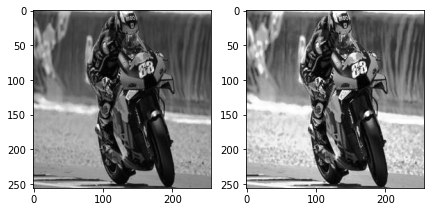

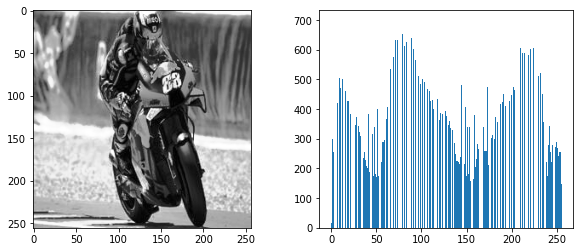

In [7]:
"""
Syntax dibawah merupakan penginisialisasian dari variabel equalizeimg1 dan 
histequalize1, yang mana diisi dengan nilai balikan dari function yang dipanggil
didalamnya yaitu function Ekualisasi dan histogram
"""
equalizeimg1 = Ekualisasi(grayimg1).astype(int)
histequalize1 = histogram(equalizeimg1).astype(int)

"""
Syntax dibawah merupakan pemanggilan function display dan 
displaywithHistogram guna menampilkan hasil citra asli dan 
perubahannya serta citra dan histogramnya
"""
display(grayimg1, equalizeimg1)
displaywithHistogram(equalizeimg1)


# 3. Melakukan Spesifikasi Histogram

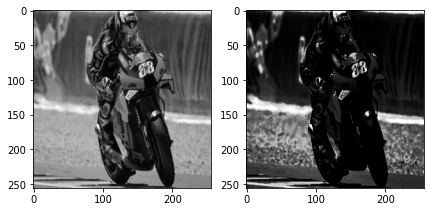

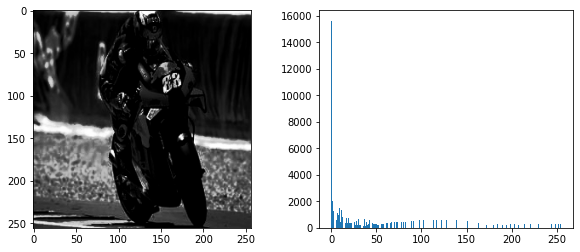

In [8]:
"""
Syntax dibawah merupakan penginisialisasian dari variabel specimg dan 
histspec, yang mana diisi dengan nilai balikan dari function yang dipanggil
didalamnya yaitu function Ekualisasi dan histogram
"""
specimg = spesification(grayimg1, grayimg2)
histspec = histogram(specimg).astype(int)

"""
Syntax dibawah merupakan pemanggilan function display dan 
displaywithHistogram guna menampilkan hasil citra asli dan 
perubahannya serta citra dan histogramnya
"""
display(grayimg1, specimg)
displaywithHistogram(specimg)